# Price Elasticity of Top 30 SKU's


### Read the historical sale data

In [12]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import math
from sklearn.linear_model import LinearRegression
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
AllSKU = pd.read_csv("C:/Users/amin.oskouei/Desktop/Top-30SKU/AllSKU-May6-365.csv") 

# Preview the first 5 lines of the loaded data 
AllSKU.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price
0,200NIPR01A-76096,2018-05-06,1.0,329.00,0.50,164.00
1,200OZEZ04A-8010,2018-05-06,3.0,289.00,0.27,115.33
2,200SSDA01A-609,2018-05-06,1.0,289.00,0.40,173.00
3,200HJSAN15D-508,2018-05-06,1.0,49.99,0.00,49.99
4,200RZIN01A-8010,2018-05-06,1.0,369.00,0.40,221.00


### Read the SKU we want to analyze

In [66]:
SKUID = pd.read_csv("C:/Users/amin.oskouei/Desktop/Top-30SKU/XX.csv")
SKUID.head()

v = SKUID.to_numpy(copy=True)



### Drop the quntity of sales < 2

In [67]:
sales = AllSKU.loc[(AllSKU['total_qty'] > 1)]
sales.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price
1,200OZEZ04A-8010,2018-05-06,3.0,289.0,0.27,115.33
23,200RZBD63A-2808,2018-05-06,2.0,89.0,0.46,48.50
26,200BINB03A-305,2018-05-06,2.0,79.0,0.50,39.50
29,200FRHMCO1F,2018-05-06,3.0,39.0,0.50,19.33
32,200MTVS27T-606R,2018-05-06,2.0,189.0,0.40,113.50


### Calculating the log(ln) of price and quantity

In [68]:
# Python program explaining 
# log() function 
import numpy as np 

logqty = np.log(sales['total_qty'])
logprice = np.log(sales['avg_paid_price'])
sales['logqty'] = logqty
sales['logprice'] = logprice
sales.head()

C:\Users\amin.oskouei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\amin.oskouei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\amin.oskouei\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price,logqty,logprice
1,200OZEZ04A-8010,2018-05-06,3.0,289.0,0.27,115.33,1.098612,4.747798
23,200RZBD63A-2808,2018-05-06,2.0,89.0,0.46,48.50,0.693147,3.881564
26,200BINB03A-305,2018-05-06,2.0,79.0,0.50,39.50,0.693147,3.676301
29,200FRHMCO1F,2018-05-06,3.0,39.0,0.50,19.33,1.098612,2.961658
32,200MTVS27T-606R,2018-05-06,2.0,189.0,0.40,113.50,0.693147,4.731803



### Extracting subset and do regression :


#### How merge data-set in Panda: https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/

In [69]:
sales_inner = pd.merge(sales, SKUID, on='sku', how='left')
sales_inner = sales_inner[sales_inner.logprice > 0]
sales_inner.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price,logqty,logprice,code
0,200OZEZ04A-8010,2018-05-06,3.0,289.0,0.27,115.33,1.098612,4.747798,13.0
1,200RZBD63A-2808,2018-05-06,2.0,89.0,0.46,48.50,0.693147,3.881564,NaN
2,200BINB03A-305,2018-05-06,2.0,79.0,0.50,39.50,0.693147,3.676301,NaN
3,200FRHMCO1F,2018-05-06,3.0,39.0,0.50,19.33,1.098612,2.961658,NaN
4,200MTVS27T-606R,2018-05-06,2.0,189.0,0.40,113.50,0.693147,4.731803,NaN


### Drop SKU with NaN code(not in our list)

In [70]:
sales_inner = sales_inner[sales_inner.code > 0]

sales_inner.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price,logqty,logprice,code
0,200OZEZ04A-8010,2018-05-06,3.0,289.0,0.27,115.33,1.098612,4.747798,13.0
13,200RZBD16A-53079,2018-05-06,9.0,149.0,0.41,87.33,2.197225,4.469694,3.0
22,200RZBD16A-71001010,2018-05-06,14.0,329.0,0.45,180.50,2.639057,5.195731,1.0
31,200GCDI02A-710010,2018-05-06,4.0,379.0,0.48,198.50,1.386294,5.290789,19.0
35,200SHG1-8010,2018-05-06,2.0,329.0,0.50,164.00,0.693147,5.099866,21.0


### ln - ln simple regression

In [71]:
subset_data = sales_inner.loc[(sales_inner['code'] == 1)]
subset_data.head()
subset_data.count(axis=0, level=None, numeric_only=False).sku


139

In [72]:
Result_list = []
Result_list2= []
from sklearn import linear_model

for i in range (1,31):
        
        subset_data = sales_inner.loc[(sales_inner['code'] == i)]
        if subset_data.count(axis=0, level=None, numeric_only=False).sku > 5 :
            reg = linear_model.LinearRegression()
            reg.fit(subset_data[['logprice']], subset_data['logqty'])
            print(SKUID.loc[(SKUID['code'] == i),"sku"], reg.coef_)
            #Result_list2.append(SKUID.loc[(SKUID['code'] == i),"sku"])
            Result_list2.append(v[i-1,0])
            Result_list.append(float(reg.coef_ ))
            
elasticity_list = pd.DataFrame({'sku': Result_list2,'elasticity': Result_list })


0    200RZBD16A-71001010
Name: sku, dtype: object [-4.74224753]
1    200RZBD16A-6709
Name: sku, dtype: object [-5.17738957]
2    200RZBD16A-53079
Name: sku, dtype: object [-5.11772999]
3    200RZBD16A-2808
Name: sku, dtype: object [-1.73310761]
4    200RZBD16A-406
Name: sku, dtype: object [-1.66316198]
5    200RZBD16A-203
Name: sku, dtype: object [-1.20639823]
6    200RZBD16A-9012
Name: sku, dtype: object [-4.22620262]
7    200OZEZ04A-508
Name: sku, dtype: object [-1.22359809]
8    200RZBD16A-305
Name: sku, dtype: object [-1.08281934]
9    200RZBD21A-71001010
Name: sku, dtype: object [-3.78660513]
10    200TAJT03-8010
Name: sku, dtype: object [-1.90337569]
11    200RZBD07A-71001010
Name: sku, dtype: object [-1.07145087]
12    200OZEZ04A-8010
Name: sku, dtype: object [-1.2644417]
13    200RZBD07A-53079
Name: sku, dtype: object [-1.39477605]
14    200OZEZ04A-6709
Name: sku, dtype: object [-1.45273099]
15    200BDSM04A-508
Name: sku, dtype: object [-0.77936514]
16    200BDSM08A-76096
Name

### Extract CSV


In [73]:
elasticity_list

,sku,elasticity
0,200RZBD16A-71001010,-4.742248
1,200RZBD16A-6709,-5.177390
2,200RZBD16A-53079,-5.117730
3,200RZBD16A-2808,-1.733108
4,200RZBD16A-406,-1.663162
5,200RZBD16A-203,-1.206398
6,200RZBD16A-9012,-4.226203
7,200OZEZ04A-508,-1.223598
8,200RZBD16A-305,-1.082819
9,200RZBD21A-71001010,-3.786605


### Export the elasticity data to csv file 

In [81]:
export_csv = elasticity_list.to_csv (r'C:/Users/amin.oskouei/Desktop/Top-30SKU/elasticity_top30_May6.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## Calculate the revenue 

In [75]:
Revenue = sales_inner
Revenue['revenue'] = Revenue['avg_paid_price'] * Revenue['total_qty']
Revenue.head()

,sku,full_date,total_qty,avg_list_price,avg_discount_rate,avg_paid_price,logqty,logprice,code,revenue
0,200OZEZ04A-8010,2018-05-06,3.0,289.0,0.27,115.33,1.098612,4.747798,13.0,345.99
13,200RZBD16A-53079,2018-05-06,9.0,149.0,0.41,87.33,2.197225,4.469694,3.0,785.97
22,200RZBD16A-71001010,2018-05-06,14.0,329.0,0.45,180.50,2.639057,5.195731,1.0,2527.00
31,200GCDI02A-710010,2018-05-06,4.0,379.0,0.48,198.50,1.386294,5.290789,19.0,794.00
35,200SHG1-8010,2018-05-06,2.0,329.0,0.50,164.00,0.693147,5.099866,21.0,328.00


### Plot the Demand function

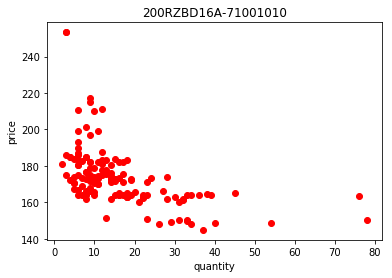

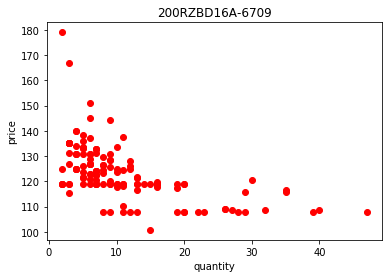

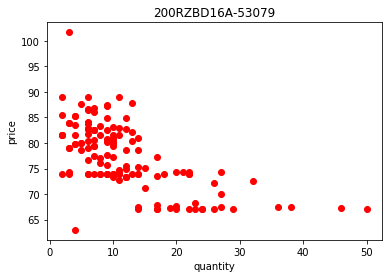

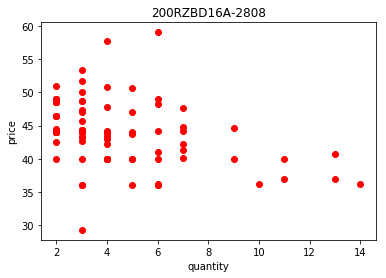

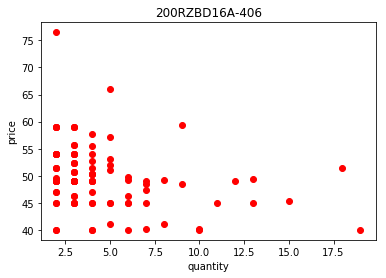

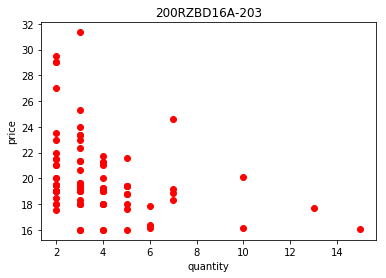

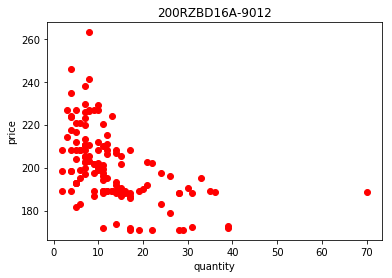

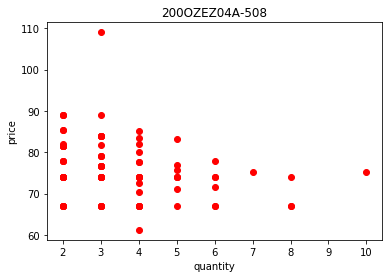

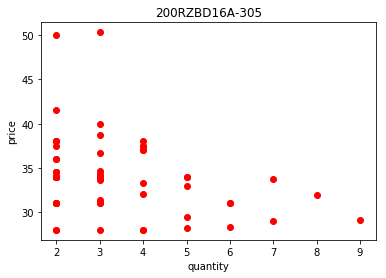

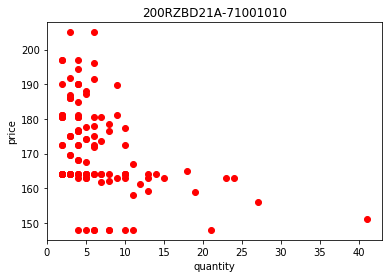

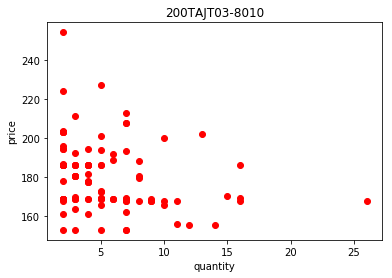

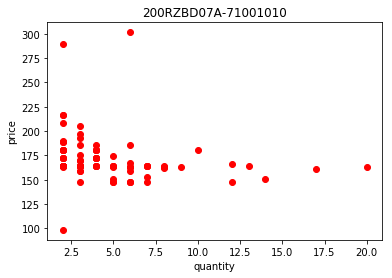

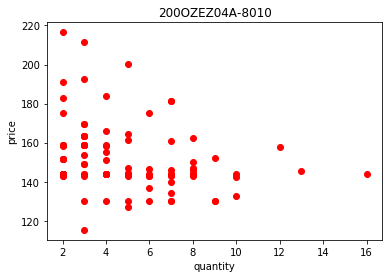

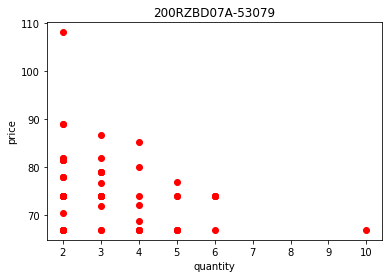

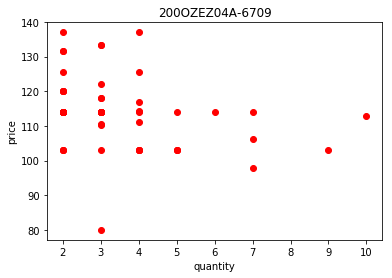

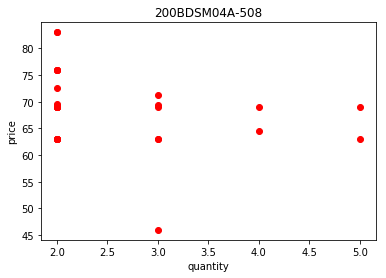

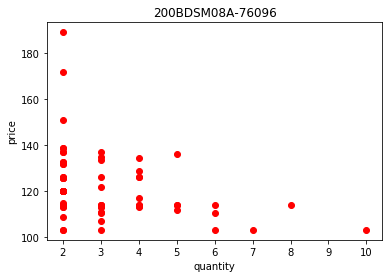

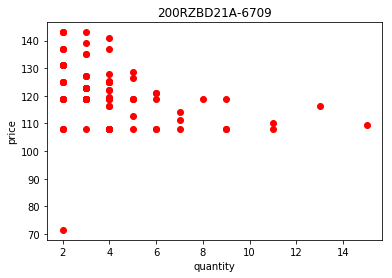

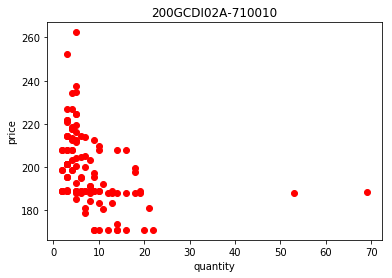

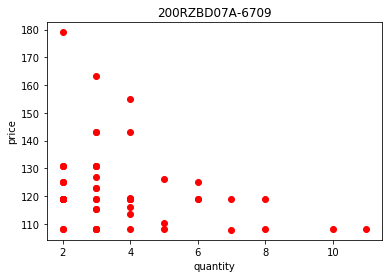

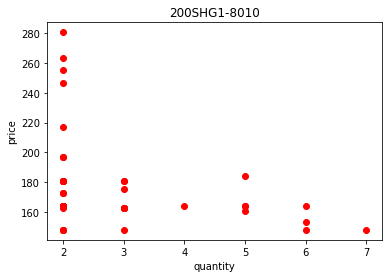

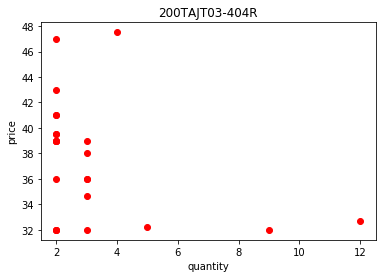

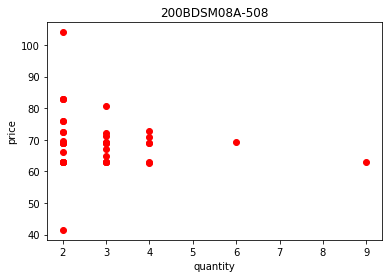

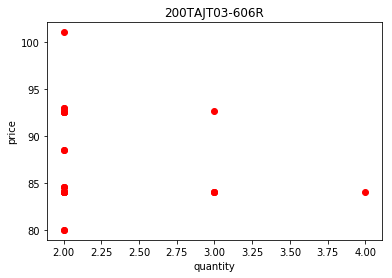

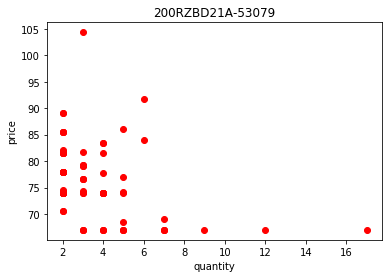

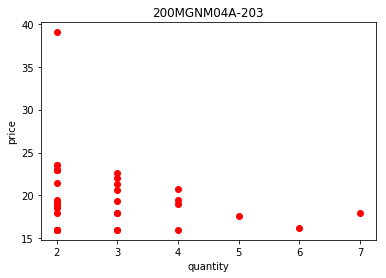

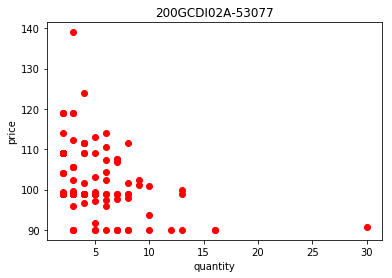

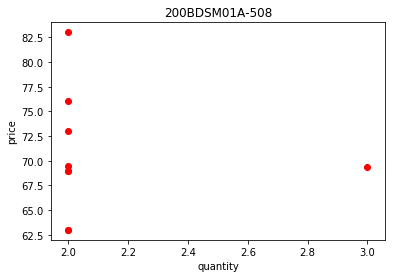

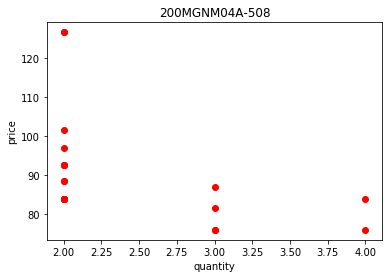

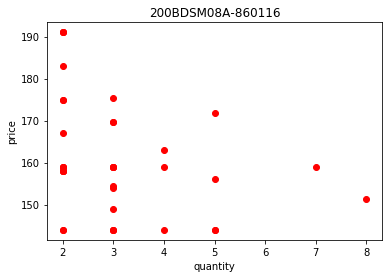

In [80]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np

for i in range (1,31):
        
        subset_data = sales_inner.loc[(sales_inner['code'] == i)]
        if subset_data.count(axis=0, level=None, numeric_only=False).sku > 0 :    
            subset_data = sales_inner.loc[(sales_inner['code'] == i)]
            # Create a Figure
            fig = plt.figure()

            # Set up Axes
            ax = fig.add_subplot(111)
           
            # Scatter the data
            ax.scatter(subset_data.total_qty, subset_data.avg_paid_price,color='red', marker='o')
            
            ax.set_title(v[i-1,0])
            ax.set_xlabel('quantity')
            ax.set_ylabel('price')

            # Show the plot
            plt.show()
         
            fig.savefig(str(i),bbox_inches='tight')
            #plt.close(fig)